In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re
%matplotlib inline

In [3]:
train=pd.read_csv('./data/train_1.csv').fillna(0) 
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
train.shape

(145063, 551)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
# for col in train.columns[1:]:
#     train[col]=pd.to_numeric(train[col],downcast='integer')
# for col in train.columns[1:]:
#     train[col]=train[col].astype('int').fillna(0)
for col in train.columns[1:]:
    train[col]=pd.to_numeric( train[col],downcast='integer').fillna(0)

In [7]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [9]:
def get_language(page):
    res=re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group()[0:2]
    return 'na'
train['lang']=train.Page.map(get_language)

from collections import Counter
print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [10]:
lang_sets={}
lang_sets['en']=train[train.lang=='en'].iloc[:,0:-1] 
lang_sets['ja']=train[train.lang=='ja'].iloc[:,0:-1] 
lang_sets['de']=train[train.lang=='de'].iloc[:,0:-1] 
lang_sets['na']=train[train.lang=='na'].iloc[:,0:-1] 
lang_sets['fr']=train[train.lang=='fr'].iloc[:,0:-1] 
lang_sets['zh']=train[train.lang=='zh'].iloc[:,0:-1] 
lang_sets['ru']=train[train.lang=='ru'].iloc[:,0:-1] 
lang_sets['es']=train[train.lang=='es'].iloc[:,0:-1] 
sums={}

for key in lang_sets:
    sums[key]=lang_sets[key].iloc[:,1:].sum(axis=0)/lang_sets[key].shape[0]

In [11]:
lang_sets[key].shape[0]

14069

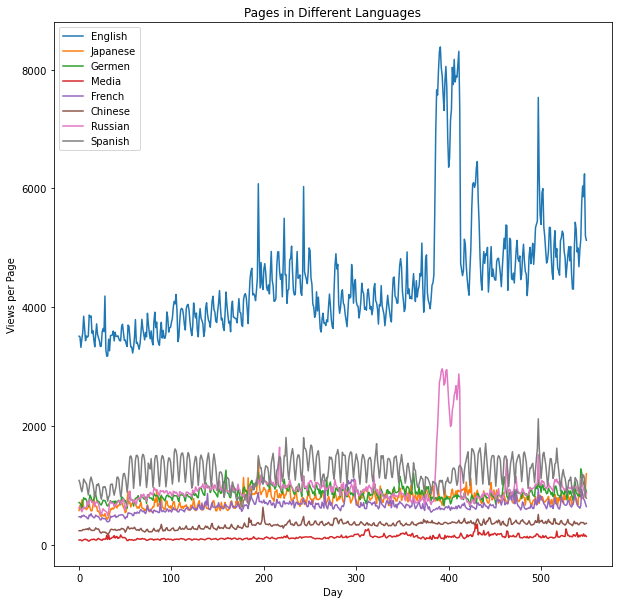

In [13]:
days=[r for r in range(sums['en'].shape[0])]

fig=plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'Germen','na':'Media','fr':'French',
       'zh':'Chinese','ru':'Russian','es':'Spanish'}

for key in sums:
    plt.plot(days,sums[key],label=labels[key])
plt.legend()
plt.show() 

In [15]:
def plot_entry(key,idx):
    data=lang_sets[key].iloc[idx,1:]
    fig=plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel("day")
    plt.ylabel('views')
    plt.show()

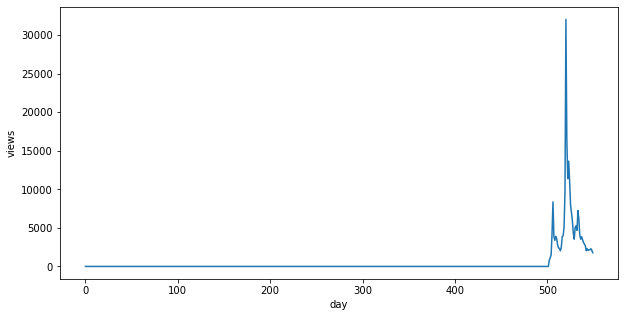

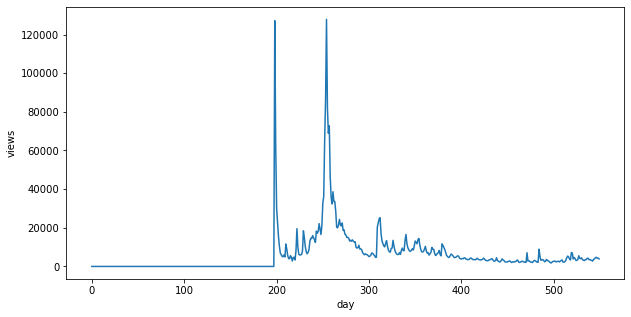

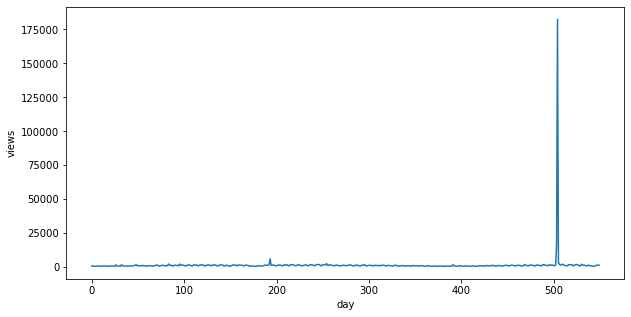

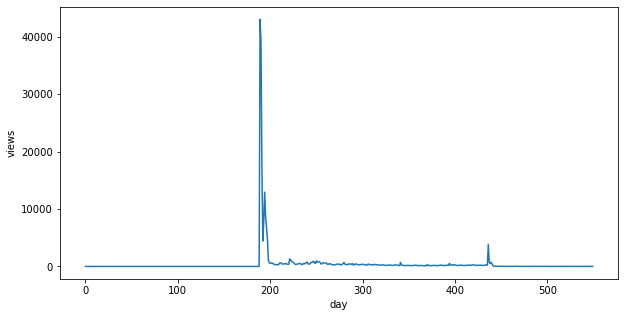

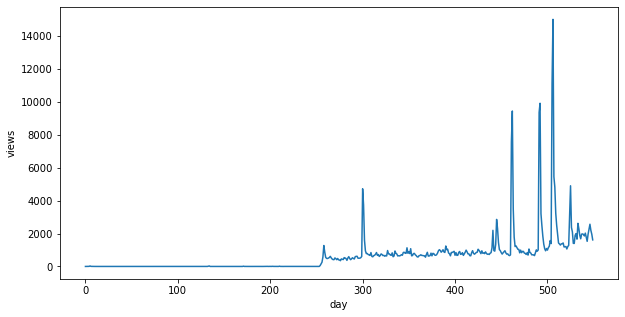

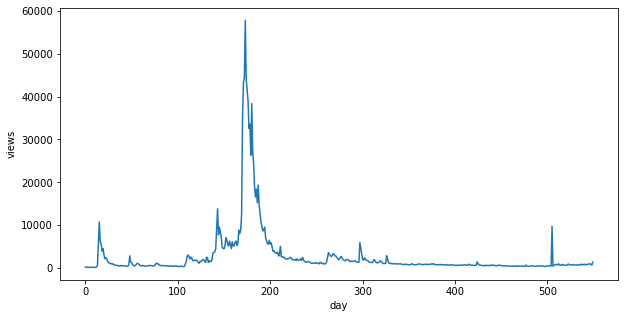

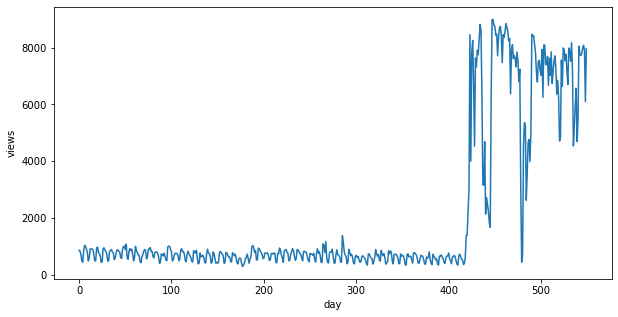

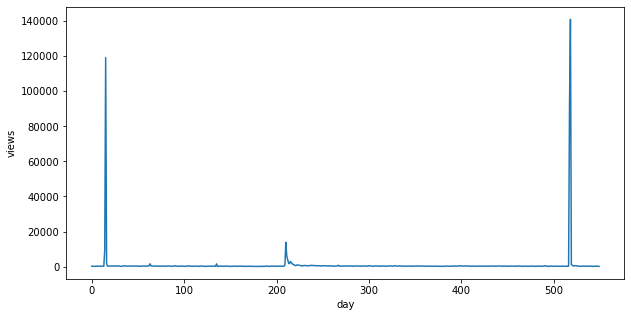

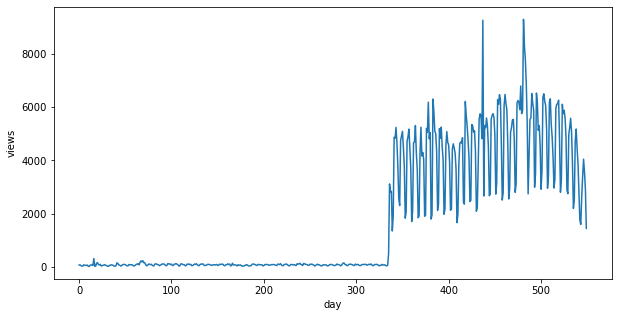

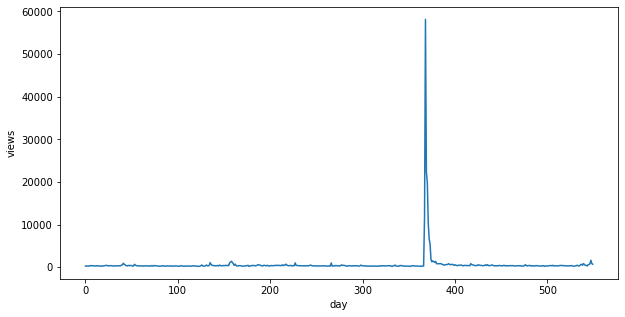

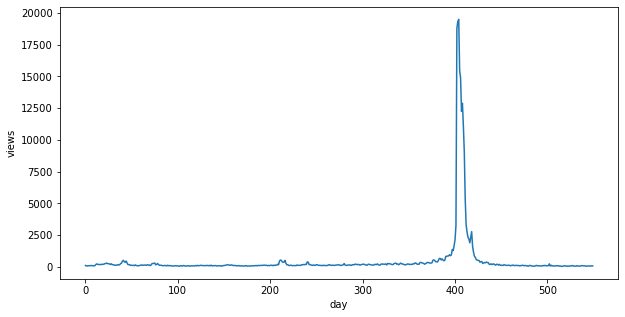

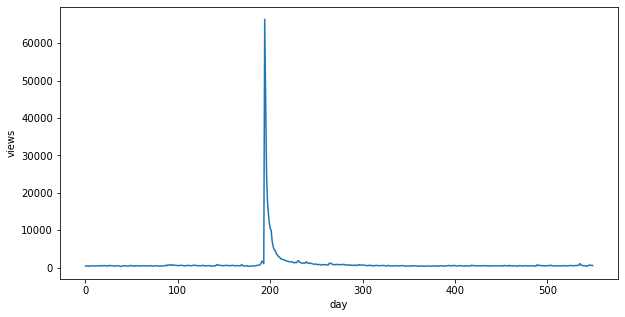

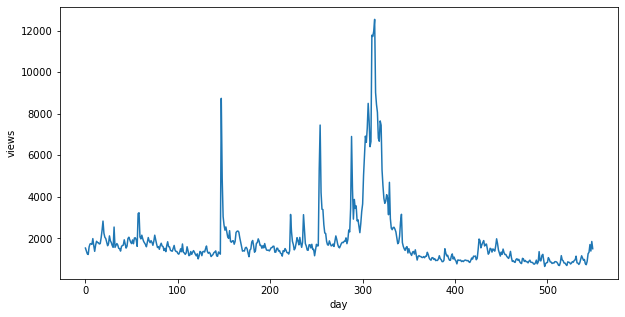

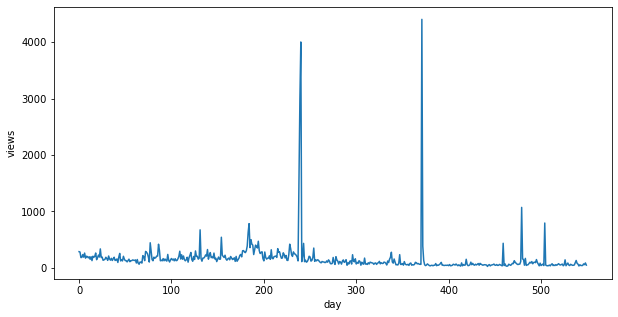

In [16]:
idx=[1,5,10,50,100,250,500,750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

In [33]:
npages=5
top_pages={}
for key in lang_sets:
    print(key) 
    sum_set=pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total']=lang_sets[key].sum(axis=1)
    sum_set=sum_set.sort_values('total',ascending=False) 
    print(sum_set.head(10))
    top_pages[key]=sum_set.index[0]
    print(len(sum_set))
    print(len(top_pages))
    print("\n\n")

en
                                                    Page        total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  12066181102
9774       Main_Page_en.wikipedia.org_desktop_all-agents   8774497458
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents   3153984882
39180  Special:Search_en.wikipedia.org_all-access_all...   1304079353
10403  Special:Search_en.wikipedia.org_desktop_all-ag...   1011847748
74690  Special:Search_en.wikipedia.org_mobile-web_all...    292162839
39172  Special:Book_en.wikipedia.org_all-access_all-a...    133993144
10399   Special:Book_en.wikipedia.org_desktop_all-agents    133285908
33644       Main_Page_en.wikipedia.org_all-access_spider    129020407
34257  Special:Search_en.wikipedia.org_all-access_spider    124310206
24108
1



ja
                                                     Page      total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415
123025

In [34]:
type(sum_set)

pandas.core.frame.DataFrame

In [29]:
sum_set.shape 

(14069, 2)

In [31]:
sum_set[:5]

,Page,total
92205,Wikipedia:Portada_es.wikipedia.org_all-access_...,751492304
95855,Wikipedia:Portada_es.wikipedia.org_mobile-web_...,565077372
90810,Especial:Buscar_es.wikipedia.org_all-access_al...,194491245
71199,Wikipedia:Portada_es.wikipedia.org_desktop_all...,165439354
69939,Especial:Buscar_es.wikipedia.org_desktop_all-a...,160431271


In [36]:
len(top_pages)

8

In [39]:
sum_set.index[0]

92205